 # Churn Modelling

Context

The dataset is the details of the customers in a company.

Content

The column are about it's estimated salary, age, sex, etc. Aiming to provide all details about an employee.

https://www.kaggle.com/datasets/shubh0799/churn-modelling/data

 ## 1. Data upload and first study

In [137]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import numpy as np
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import torch
import torch.nn as nn

In [139]:
# Data upload
df = pd.read_csv('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Churn Modelling/Churn_Modelling.csv.xls')

In [141]:
# First study
display(df.info())
display(df.head(10))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [143]:
# Check duplicates
df.duplicated().sum()

0

In [145]:
# Delete columns "RowNumber", "CustomerId" and "Surname"
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [147]:
# Check other duplicate
object_columns = [col for col in df.select_dtypes(include=['object']).columns if col not in ['DateCrawled', 'DateCreated', 'LastSeen']]



for col in object_columns:
    print(df[col].value_counts())
    print()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender
Male      5457
Female    4543
Name: count, dtype: int64



In [149]:
# Replace Female by 0 and Male by 1

df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
print(df['Gender'].head(5))

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64


/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_19705/1120077321.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


## Analysis of data

In [152]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [154]:
# Building histogram
plt.figure(figsize=(100, 100)) # size's matrix of histogram
df_describe = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']] # choice all features
num_cols = 2 # Amount of columns
num_rows = (len(df_describe.columns) + num_cols - 1) // num_cols # Amount of ranges
total_plots = num_cols * num_rows # Size of matrix

def count_bin(col): # Function for a return of amount of bins
    return len(df_describe[col].unique()) if len(df_describe[col].unique())<10 else 15

# Using cycle we create a histogram of distribution for every column
for i, col in enumerate(df_describe.columns):
    plt.rcParams.update({'font.size': 50})  # Setting the size of type for title 
    plt.rcParams.update({'axes.labelsize': 50})  # Setting the size of type for axis 
    plt.subplot(num_rows, num_cols, i+1) # Choice histogram for "i" in matrix
    plt.hist(df_describe[col], bins=count_bin(col)) # Building histogram for every column
    plt.title(col) # Assignment title for every column
    plt.xlabel('Значение')
    plt.ylabel('Частота')

plt.tight_layout() # Starting the function for automatic regulation of elemnts
plt.show()

 #### Build box-plots for every numerical columns

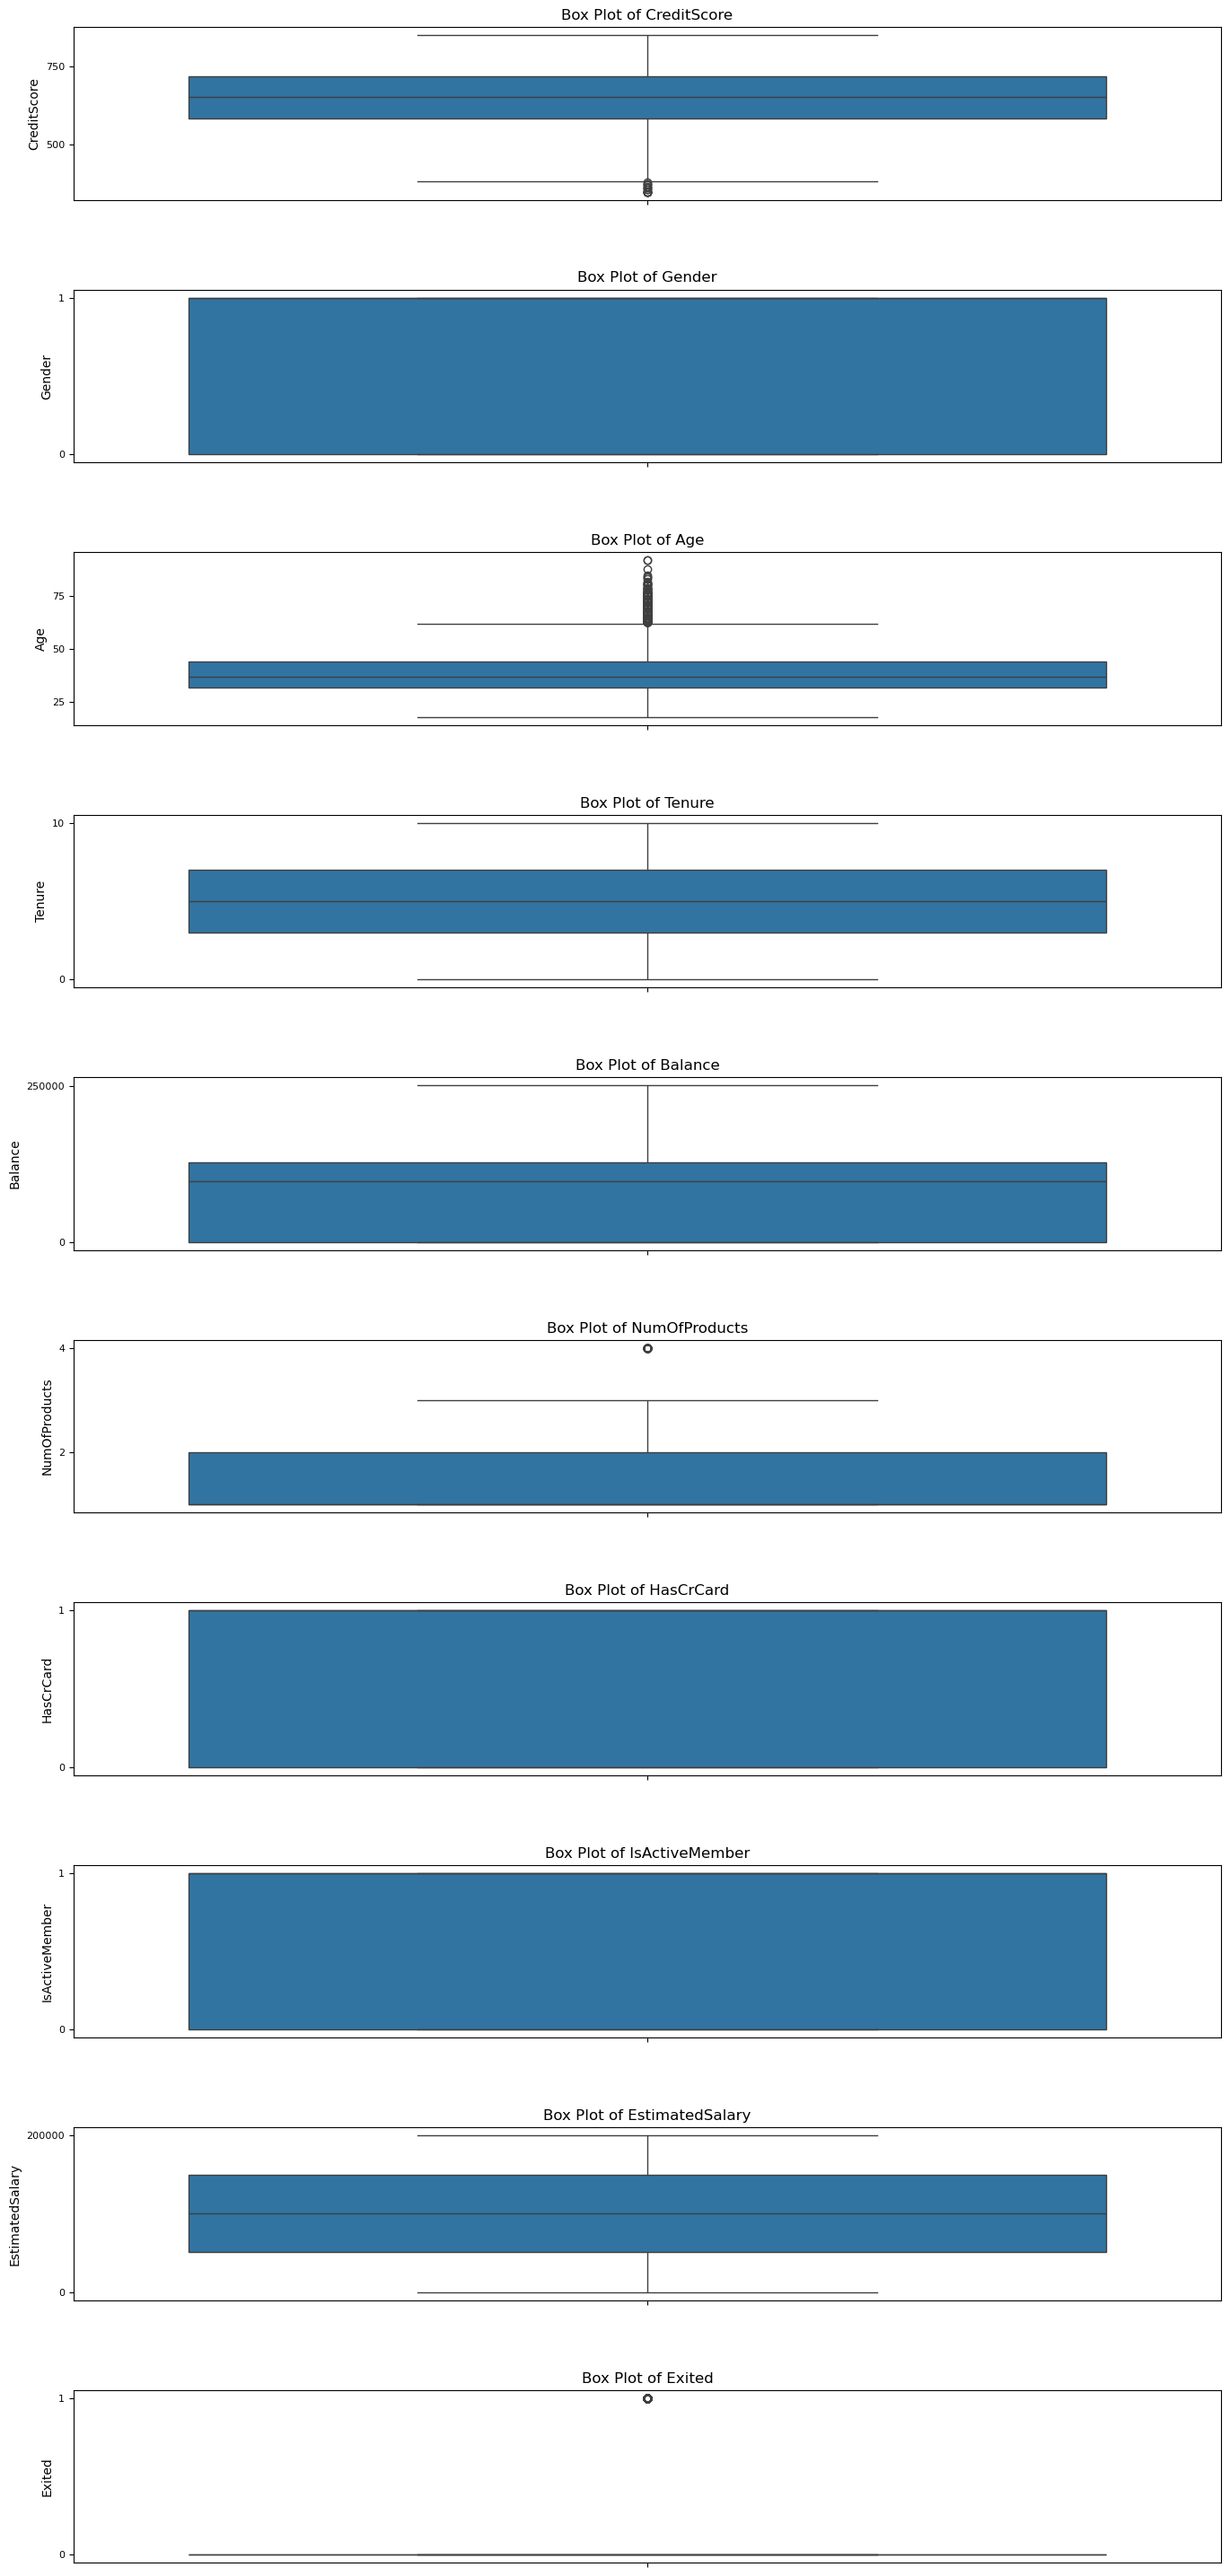

In [156]:
# Creating box plots for each numerical feature
numerical_features = df.select_dtypes(include=['number'])

# Define the figure size once
plt.figure(figsize=(15, len(numerical_features.columns) * 3))

# Create subplots for each numerical feature
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features.columns), 1, i + 1)  # Create a subplot
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}', fontsize=12)  # Font size of the title
    plt.ylabel(feature, fontsize=10)  # Font size of the Y-axis label
    plt.xlabel('')  # Remove X-axis label if not needed
    
    # Increase font size of axis labels
    plt.xticks(fontsize=8)  # Font size of X-axis tick labels
    plt.yticks(fontsize=8)  # Font size of Y-axis tick labels

plt.tight_layout()  # Automatically adjusts subplots
plt.show()

 #### Build a matrix of dependences for target

interval columns not set, guessing: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_19705/3291478919.py:9: SyntaxWarning: invalid escape sequence '\p'
  title='Корреляция $\phi_k$',


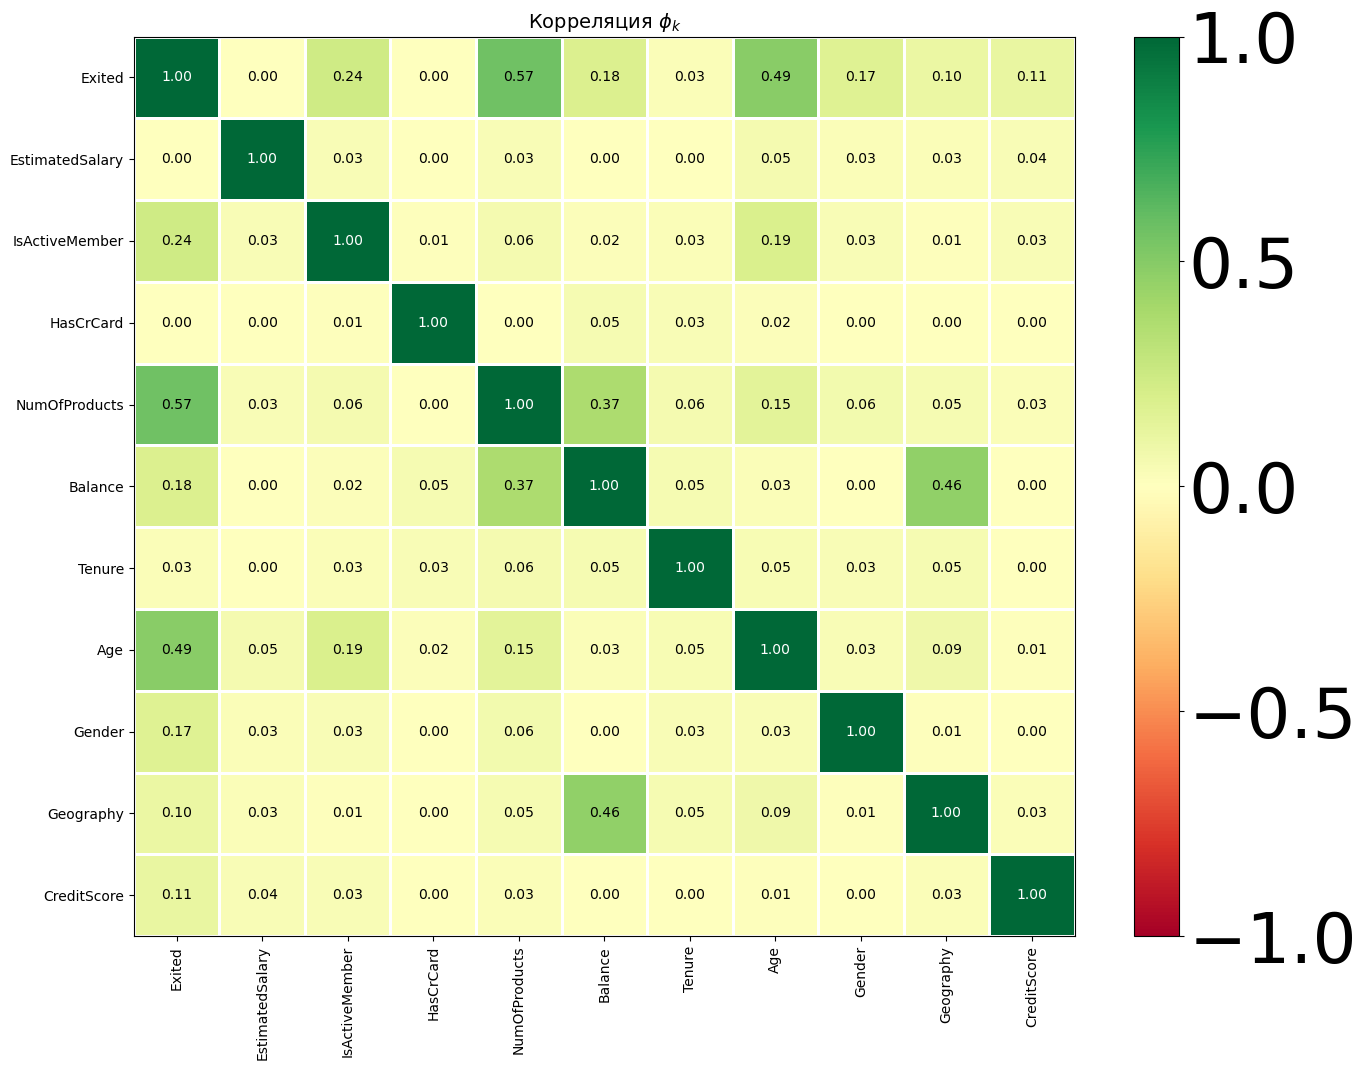

In [158]:
# Receive a correlation
phik_corr = df.phik_matrix()

# Build   
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    title='Корреляция $\phi_k$',
    identity_layout=True,
    figsize=(15, 12)
)


 #### PCA

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


In [161]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [162]:
# Replace Female by 0 and Male by 1

df['Geography'] = df['Geography'].replace({'France': 0, 'Germany': 1, 'Spain':2})
print(df['Geography'].head(5))

0    0
1    2
2    0
3    0
4    2
Name: Geography, dtype: int64


/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_19705/1204892968.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Geography'] = df['Geography'].replace({'France': 0, 'Germany': 1, 'Spain':2})


In [163]:
def feature_importance_with_lin(df, target_variable):
    X = df.drop([target_variable], axis=1)
    y = df[target_variable]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_scaled, y)

    importance = model.coef_

    if importance.shape[0] > 1:
        importance = importance.mean(axis=0)

    # Преобразуйте в одномерный массив, если это необходимо
    importance = importance.flatten()

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    })

    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    return importance_df

In [164]:
def feature_importance_with_random_forest(df, target_variable):
    # Remove the target variable 
    X = df.drop([target_variable], axis=1)
    y = df[target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a random forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)

    # Get feature importances
    importance = model.feature_importances_

    # Create a DataFrame to store feature names and their corresponding importance scores
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    })

    # Sort the DataFrame by importance in descending order
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    return importance_df

In [165]:
def feature_importance_pca(df, columns_to_drop):
    # Drop specified columns
    X = df.drop(columns=columns_to_drop)

    # Initialize the StandardScaler to standardize the features
    scaler = StandardScaler()

    # Fit the scaler to the data and transform it to standardized values
    scaled_data = scaler.fit_transform(X)

    # Initialize PCA (Principal Component Analysis)
    pca = PCA()

    # Fit PCA on the scaled data to compute principal components
    pca.fit(scaled_data)

    # Get the explained variance ratio for each principal component
    explained_variance = pca.explained_variance_ratio_

    # Get the components (loadings) of PCA
    components = pca.components_

    # Calculate feature importance as the sum of absolute values of components multiplied by explained variance
    importance = abs(components).sum(axis=0) * explained_variance

    # Create a DataFrame to hold feature names and their corresponding importance scores
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    })

    return importance_df

In [167]:
importance_lin = feature_importance_with_lin(df, 'Exited')
importance_lin

,Feature,Importance
3,Age,0.762656
5,Balance,0.309578
1,Geography,0.070353
9,EstimatedSalary,0.028487
7,HasCrCard,-0.012675
6,NumOfProducts,-0.022812
4,Tenure,-0.042168
0,CreditScore,-0.063799
2,Gender,-0.270174
8,IsActiveMember,-0.539329


In [169]:
importance_forest = feature_importance_with_random_forest(df, 'Exited')
importance_forest

,Feature,Importance
3,Age,0.240586
9,EstimatedSalary,0.147489
0,CreditScore,0.142334
5,Balance,0.139068
6,NumOfProducts,0.132435
4,Tenure,0.080967
8,IsActiveMember,0.042377
1,Geography,0.037337
2,Gender,0.019025
7,HasCrCard,0.018385


In [178]:
importance_pca = feature_importance_pca(df, ['Exited'])
importance_pca

,Feature,Importance
0,CreditScore,0.322832
1,Geography,0.262161
2,Gender,0.234134
3,Age,0.225893
4,Tenure,0.259900
5,Balance,0.173610
6,NumOfProducts,0.194274
7,HasCrCard,0.241898
8,IsActiveMember,0.187648
9,EstimatedSalary,0.164649


 #### Column 'Age'

In [182]:
df.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_19705/3820118756.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


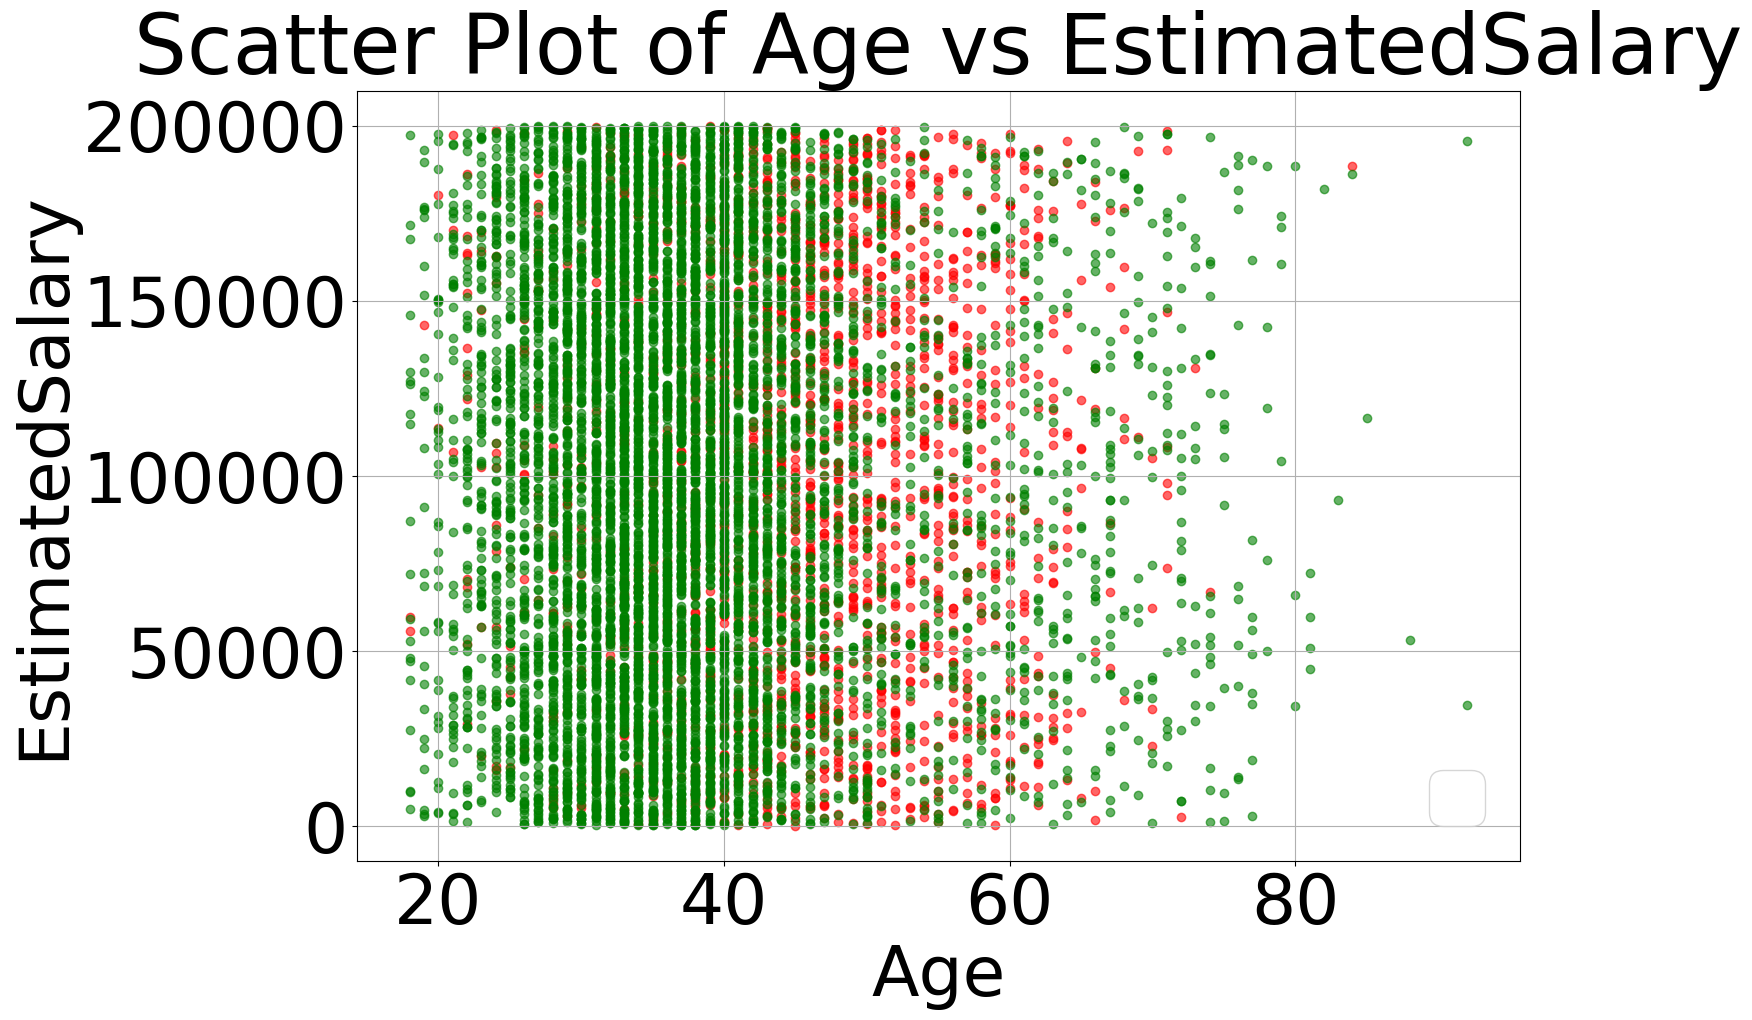

In [252]:
plt.figure(figsize=(15, 10))

# Exited = 1 (red)
plt.scatter(df[df['Exited'] == 1]['Age'], df[df['Exited'] == 1]['EstimatedSalary'], 
            color='red',  alpha=0.6)


# Exited = 0 (green)
plt.scatter(df[df['Exited'] == 0]['Age'], df[df['Exited'] == 0]['EstimatedSalary'], 
            color='green',  alpha=0.6)


# Настройка графика
plt.title('Scatter Plot of Age vs EstimatedSalary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.grid(True)
plt.show()

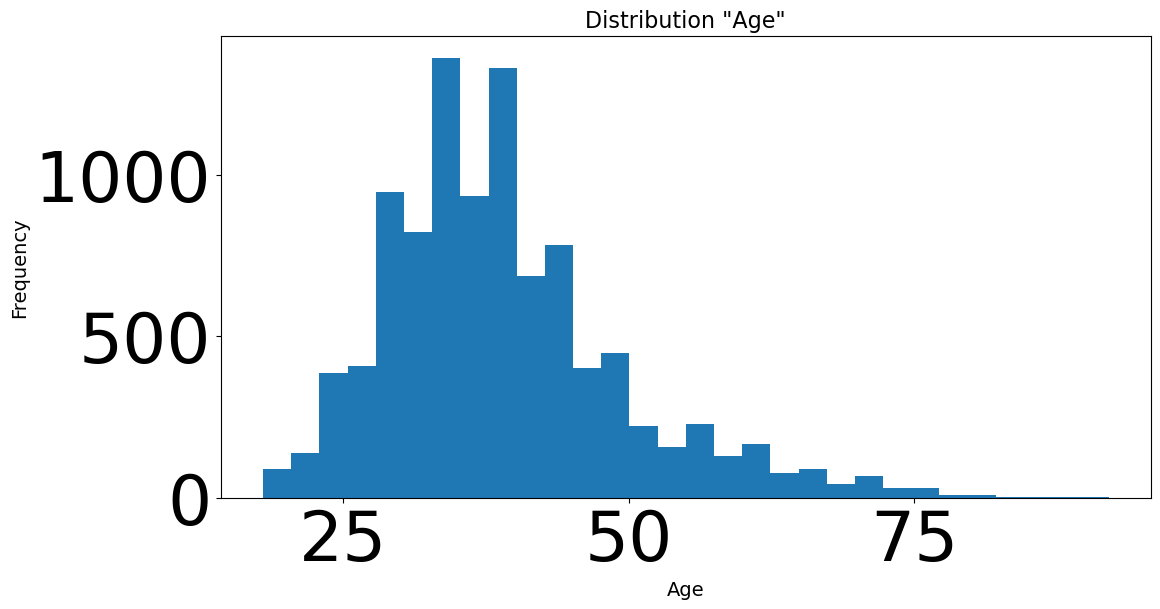

In [216]:
# Создание фигуры и оси
plt.figure(figsize=(12, 6))

# Построение гистограммы
plt.hist(df['Age'], bins=30)

# Добавление заголовка и меток осей
plt.title('Distribution "Age"', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Показать график
plt.show()

 #### Column 'Balance'

In [118]:
df.Balance.describe()

count      9641.000000
mean      76560.672538
std       62401.698405
min           0.000000
25%           0.000000
50%       97318.250000
75%      127660.460000
max      250898.090000
Name: Balance, dtype: float64

In [220]:
df.query('Balance == 0')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.0,1,1,1,101348.88,1
3,699,0,0,39,1,0.0,2,0,0,93826.63,0
6,822,0,1,50,7,0.0,2,1,1,10062.80,0
11,497,2,1,24,3,0.0,2,1,0,76390.01,0
12,476,0,0,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,2,1,28,4,0.0,2,1,1,179436.60,0
9992,726,2,1,36,2,0.0,1,1,0,195192.40,0
9994,800,0,0,29,2,0.0,2,0,0,167773.55,0
9995,771,0,1,39,5,0.0,2,1,0,96270.64,0


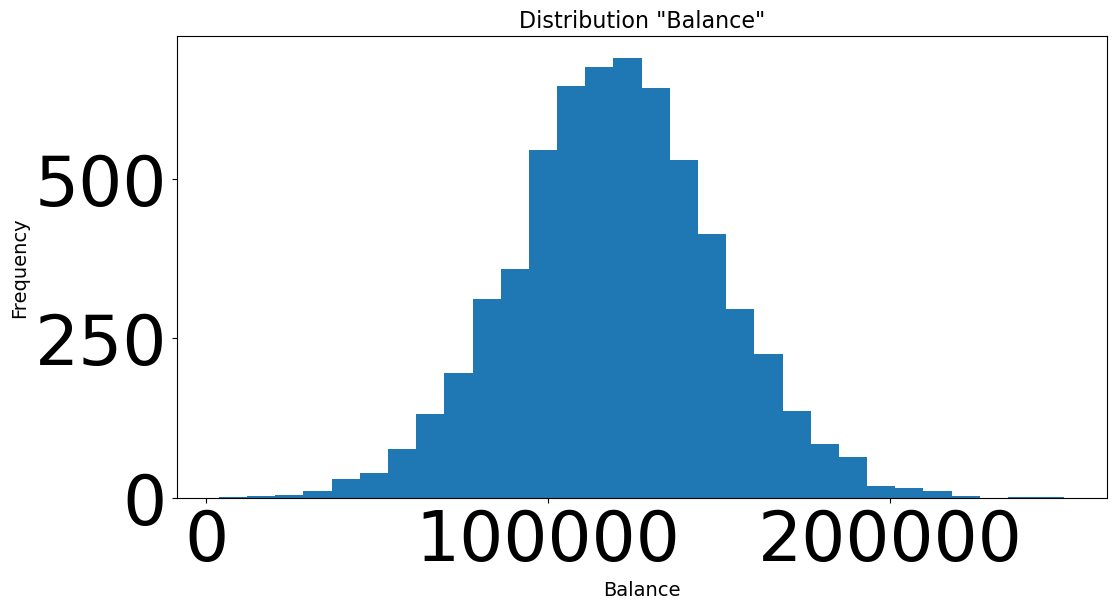

In [124]:
# Создание фигуры и оси
plt.figure(figsize=(12, 6))

# Построение гистограммы
plt.hist(df[df['Balance']!=0]['Balance'], bins=30)

# Добавление заголовка и меток осей
plt.title('Distribution "Balance"', fontsize=16)
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Показать график
plt.show()

 #### Column 'EstimatedSalary'

In [133]:
df.EstimatedSalary.describe()

count      9641.000000
mean     100172.421223
std       57512.265414
min          11.580000
25%       51113.140000
50%      100324.010000
75%      149458.730000
max      199992.480000
Name: EstimatedSalary, dtype: float64

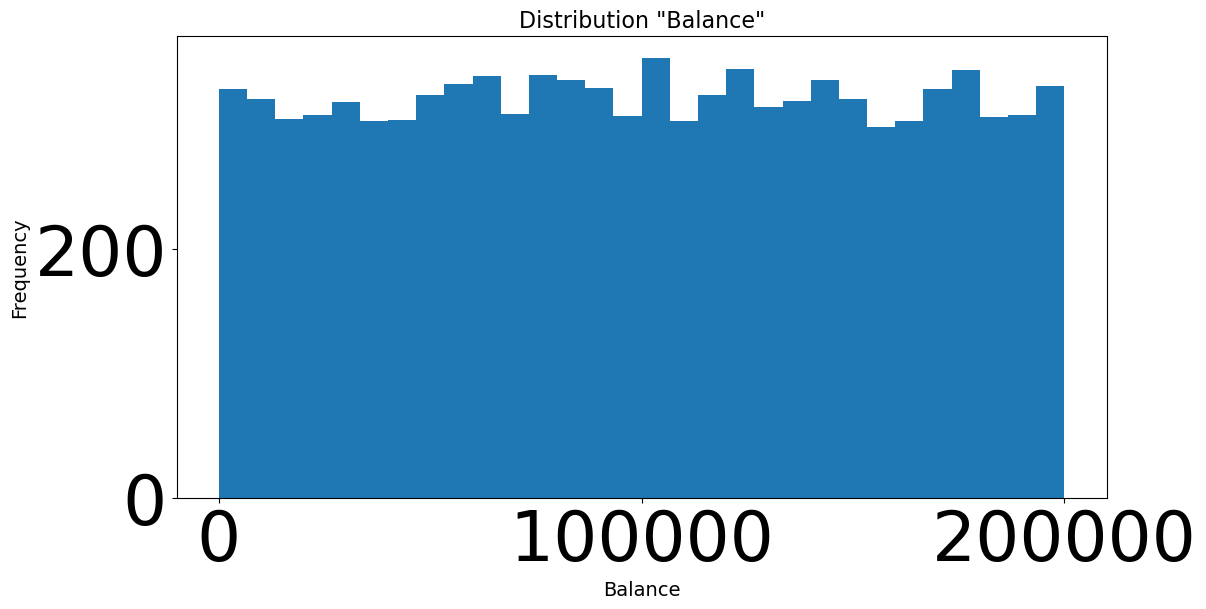

In [135]:
# Создание фигуры и оси
plt.figure(figsize=(12, 6))

# Построение гистограммы
plt.hist(df['EstimatedSalary'], bins=30)

# Добавление заголовка и меток осей
plt.title('Distribution "Balance"', fontsize=16)
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Показать график
plt.show()

 #### Column 'IsActiveMember'

In [255]:
df.query('IsActiveMember == 0  and Exited == 1').describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.0,1302.000000,1302.0
mean,645.410138,0.815668,0.443164,44.880184,5.013825,90988.807081,1.441628,0.723502,0.0,101923.869962,1.0
std,101.716676,0.754062,0.496950,9.697948,2.934037,58262.218381,0.772840,0.447438,0.0,57934.824574,0.0
min,350.000000,0.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,0.0,91.750000,1.0
25%,576.000000,0.000000,0.000000,38.250000,2.000000,34314.702500,1.000000,0.000000,0.0,53068.995000,1.0
50%,648.000000,1.000000,0.000000,45.000000,5.000000,109252.725000,1.000000,1.000000,0.0,102431.875000,1.0
75%,716.000000,1.000000,1.000000,51.000000,8.000000,131429.772500,2.000000,1.000000,0.0,152519.127500,1.0
max,850.000000,2.000000,1.000000,84.000000,10.000000,222267.630000,4.000000,1.000000,0.0,199725.390000,1.0


In [257]:
df.query('IsActiveMember == 1  and Exited == 1').describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.0,735.000000,735.0
mean,645.247619,0.786395,0.436735,44.763265,4.789116,91320.636476,1.534694,0.655782,1.0,100654.022367,1.0
std,97.869686,0.743238,0.496319,9.879437,2.936270,58574.133553,0.847231,0.475436,0.0,57903.233747,0.0
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,1.0,11.580000,1.0
25%,581.000000,0.000000,0.000000,38.000000,2.000000,44441.750000,1.000000,0.000000,1.0,50543.215000,1.0
50%,644.000000,1.000000,0.000000,45.000000,5.000000,109922.610000,1.000000,1.000000,1.0,102517.830000,1.0
75%,715.500000,1.000000,1.000000,51.000000,7.000000,131393.860000,2.000000,1.000000,1.0,150677.920000,1.0
max,850.000000,2.000000,1.000000,74.000000,10.000000,250898.090000,4.000000,1.000000,1.0,199808.100000,1.0


 ## Data preparation

 ### Prepare numerical and categorial columns

In [112]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [113]:
df = pd.get_dummies(df, drop_first=True)

# Select a features and target
features = df.drop(['Exited'], axis=1)
target = df['Exited']

smote = SMOTE(random_state=42)

X, y = smote.fit_resample(features, target)


# Part a data for train and test
features_train, features_test, target_train, target_test = train_test_split(X, y, random_state=12345, test_size=0.2)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)


# Check a target in train data and test data
print('Train data', target_train.value_counts())
print()
print('Test data', target_test.value_counts())

Train data Exited
0    6416
1    6324
Name: count, dtype: int64

Test data Exited
1    1639
0    1547
Name: count, dtype: int64


 #### Write the function for metrics

In [115]:
def metrics(predictions, target):
    accuracy = accuracy_score(target, predictions)
    precision = precision_score(target, predictions)
    recall = recall_score(target, predictions)
    f1 = f1_score(target, predictions)
    roc = roc_auc_score(target, predictions)
    return {'accuracy': accuracy, 'precision': precision, 'recal': recall, 'f1': f1, 'roc': roc}

 #### Train LogisticRegression model 

In [117]:
max_iter = [50, 100, 150]                      
solvers = ['liblinear', 'newton-cg', 'lbfgs'] 
best_result = 0
logistic_regres, best_iter, best_solver = None, None, None

for iter in max_iter:
    for solver in solvers:
        model = LogisticRegression(class_weight='balanced', random_state=12345, max_iter=iter, solver=solver)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if result > best_result:
            logistic_regres = metrics(predictions, target_test)
            best_iter = iter
            best_solver = solver


print(f'The best parameters: max_iter={best_iter}, solver={best_solver}')
print('Test data', logistic_regres)

The best parameters: max_iter=150, solver=lbfgs
Test data {'accuracy': 0.7878217200251099, 'precision': 0.7937766931055522, 'recal': 0.7937766931055522, 'f1': 0.7937766931055522, 'roc': 0.7876446490737846}


 #### Train DecisionTree Model

In [119]:
best_result = 0
best_depth = 0
dec_tree = None
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state = 12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result = recall_score(target_test, predictions)
    if best_result < result:
        dec_tree = metrics(predictions, target_test)
        best_depth = depth
        best_result = result

print(f'The best parameters: depth={best_depth}')
print('Test data', dec_tree)

The best parameters: depth=9
Test data {'accuracy': 0.8292529817953547, 'precision': 0.8332318928788801, 'recal': 0.8352654057352044, 'f1': 0.8342474101157831, 'roc': 0.8290742025443959}


 #### Train Randomforest Model

In [121]:
best_result, best_depth, best_est = 0, 0, 0
rand_forest = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if best_result < result:
            rand_forest = metrics(predictions, target_test)
            best_depth = depth
            best_est = est
            best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', rand_forest)

The best parameters: depth=8, est=80
Test data {'accuracy': 0.8389830508474576, 'precision': 0.8391566265060241, 'recal': 0.849908480780964, 'f1': 0.8444983328281297, 'roc': 0.8386581835061898}


 #### Train KNeighborsClassifier model

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

best_result, best_n_neighbors, best_metric = 0, 0, ''
knn = None

for n_neighbors in range(1, 21):  
    for metric in ['euclidean', 'manhattan', 'minkowski']:  
        model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        
        if best_result < result:
            knn = metrics(predictions, target_test)
            best_n_neighbors = n_neighbors
            best_metric = metric
            best_result = result

print(f'The best parameters: n_neighbors={best_n_neighbors}, metric={best_metric}')
print('Test data metrics:', knn)

The best parameters: n_neighbors=1, metric=manhattan
Test data metrics: {'accuracy': 0.8289391086001255, 'precision': 0.8158198614318707, 'recal': 0.862111043319097, 'f1': 0.8383269059626224, 'roc': 0.8279527420861807}


 #### Train XGBlassifier

In [125]:
from xgboost import XGBClassifier

best_result, best_depth, best_est, best_learning_rate = 0, 0, 0, 0

xgb = None
pos_weight = sum(target_train == 0) / sum(target_train == 1)

for est in range(10, 110, 10):
    for depth in range(1, 10):
        for learning_rate in [0.01, 0.1, 0.2]:  
            model = XGBClassifier(
                random_state=12345,
                max_depth=depth,
                n_estimators=est,
                learning_rate=learning_rate,
                scale_pos_weight=pos_weight
            )
            model.fit(features_train, target_train)
            predictions = model.predict(features_test)
            result = recall_score(target_test, predictions)
            
            if best_result < result:
                xgb = metrics(predictions, target_test)
                best_depth = depth
                best_est = est
                best_learning_rate = learning_rate
                best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}, learning_rate={best_learning_rate}')
print('Best F1 Score:', xgb)

The best parameters: depth=9, est=100, learning_rate=0.2
Best F1 Score: {'accuracy': 0.8750784682988073, 'precision': 0.8767455980570734, 'recal': 0.8810250152532032, 'f1': 0.8788800973828362, 'roc': 0.8749016478980949}


 #### Train LGBMregressor Model

In [127]:
best_est = 0
best_result = 0
best_depth = 0
lgbm = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = LGBMClassifier(random_state=12345, max_depth=depth, num_leaves=31, n_estimators=est, learning_rate=0.2, boosting_type='gbdt', verbose=-1) # Инициализируем модель с заданным количеством деревьев
        model.fit(features_train, target_train)
        predicted = model.predict(features_test)
        result = recall_score(target_test, predicted)
        if result > best_result:
            lgbm = metrics(predicted, target_test)
            best_est = est
            best_depth = depth
            best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', lgbm)

The best parameters: depth=9, est=90
Test data {'accuracy': 0.85969868173258, 'precision': 0.8625304136253041, 'recal': 0.8651616839536302, 'f1': 0.8638440450807189, 'roc': 0.8595362395204479}


 #### Train Catboost Model

In [129]:
best_est = 0
best_result = 0
best_depth = 0
cat_boost = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = CatBoostClassifier(random_state=12345, max_depth=depth, n_estimators=est, learning_rate=0.2, verbose=0) # Инициализируем модель с заданным количеством деревьев
        model.fit(features_train, target_train)
        predicted = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
            cat_boost = metrics(predictions, target_test)

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', cat_boost)

The best parameters: depth=1, est=10
Test data {'accuracy': 0.8750784682988073, 'precision': 0.8767455980570734, 'recal': 0.8810250152532032, 'f1': 0.8788800973828362, 'roc': 0.8749016478980949}


 #### Train MLPClassifier Model

In [131]:
best_est = 0
best_result = 0
best_hidden_layer_size = 0
best_learning_rate = 0
mlp_model = None

for hidden_layer_size in [(10,), (20,), (30,)]:  
    for learning_rate in [0.01, 0.1, 0.2]:  
        model = MLPClassifier(hidden_layer_sizes=hidden_layer_size, learning_rate_init=learning_rate,
                              max_iter=500, random_state=12345)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)

        if result > best_result:
            best_result = result
            best_hidden_layer_size = hidden_layer_size
            best_learning_rate = learning_rate
            mlp_model = metrics(predictions, target_test)

print(f'The best parameters: hidden_layer_size={best_hidden_layer_size}, learning_rate={best_learning_rate}')
print('Test data accuracy:', mlp_model)

The best parameters: hidden_layer_size=(20,), learning_rate=0.01
Test data accuracy: {'accuracy': 0.835216572504708, 'precision': 0.8355421686746988, 'recal': 0.8462477120195241, 'f1': 0.8408608669293726, 'roc': 0.834888561892115}


 #### Neuronet Keras

In [133]:
# Convert features and target to Tensor 
X_train = torch.from_numpy(features_train).float()
X_test = torch.from_numpy(features_test).float()

y_train = torch.from_numpy(target_train.values).float()
y_test = torch.from_numpy(target_test.values).float()

In [134]:
# Example Neuronet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential([
    Input(shape=[X_train.shape[1]]),
    Dense(9, activation='relu'),
    BatchNormalization(),
    Dense(5, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid'),
])
optimizer = Adam(learning_rate=0.009096369882470343)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Model training
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=100,
    shuffle = True,
    callbacks=[early_stopping],
    verbose=0
)

In [135]:
import numpy as np

y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

net_keras = metrics(y_pred_binary, y_test)

# Вывод результатов метрик
print(net_keras)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
{'accuracy': 0.837413684871312, 'precision': 0.8234275822273515, 'recal': 0.8706528370957901, 'f1': 0.8463819691577699, 'roc': 0.8364253196467962}


 ## Conclusion

In [137]:
# Build a table for total

model_metrics = [logistic_regres, dec_tree, rand_forest, lgbm, cat_boost, xgb, knn, mlp_model, net_keras]

total = pd.DataFrame(model_metrics, index=['LogisticRegression', 'DecisionTree', 'RandomForest', 'LGBM', 'CatBoost', 'XGBClassifier', 'KNeighborsClassifier', 'MLPClassifier', 'NeuroNet_Keras'])
print(total.sort_values(by='accuracy', ascending=False))

                      accuracy  precision     recal        f1       roc
CatBoost              0.875078   0.876746  0.881025  0.878880  0.874902
XGBClassifier         0.875078   0.876746  0.881025  0.878880  0.874902
LGBM                  0.859699   0.862530  0.865162  0.863844  0.859536
RandomForest          0.838983   0.839157  0.849908  0.844498  0.838658
NeuroNet_Keras        0.837414   0.823428  0.870653  0.846382  0.836425
MLPClassifier         0.835217   0.835542  0.846248  0.840861  0.834889
DecisionTree          0.829253   0.833232  0.835265  0.834247  0.829074
KNeighborsClassifier  0.828939   0.815820  0.862111  0.838327  0.827953
LogisticRegression    0.787822   0.793777  0.793777  0.793777  0.787645
